In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
import math
from math import gamma
import seaborn as sns
%matplotlib inline

# (1)

Change in reliability with hamming code 29.600000000000033%


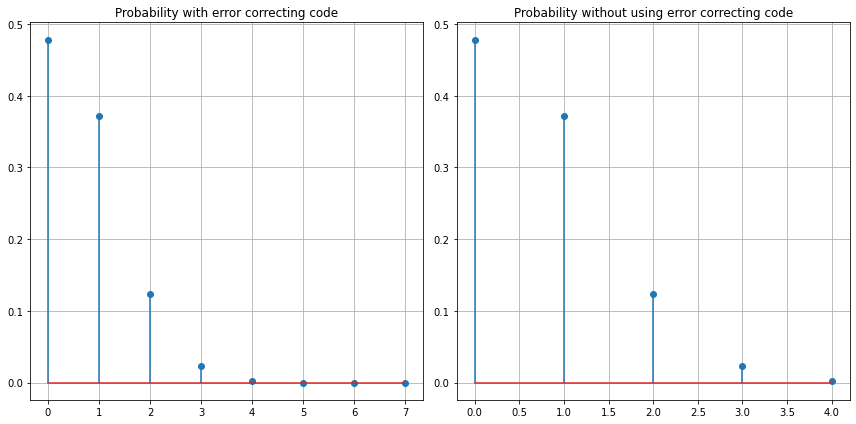

In [66]:
from math import comb
def binom(n,k,p):
    return comb(n,k)*(p**k)*((1-p)**(n-k))

rel_without_ham = binom(4,0,0.1)
rel_with_ham = binom(7,0,0.1) + binom(7,1,0.1)
change_reliability = (rel_with_ham - rel_without_ham)/rel_without_ham
print(f"Change in reliability with hamming code {change_reliability*100}%")

    
n1=np.arange(0,8,1)
x_1=[]
for i in range(0,8):
    x_1.append(binom(7,i,0.1))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Probability with error correcting code')
plt.stem(n1,x_1)
plt.grid()

n2=np.arange(0,5,1)
x_2=[]
for i in range(0,5):
    x_2.append(binom(7,i,0.1))
plt.subplot(1,2,2)
plt.title('Probability without using error correcting code')
plt.stem(n2,x_2)
plt.grid()

plt.tight_layout()

# (2)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


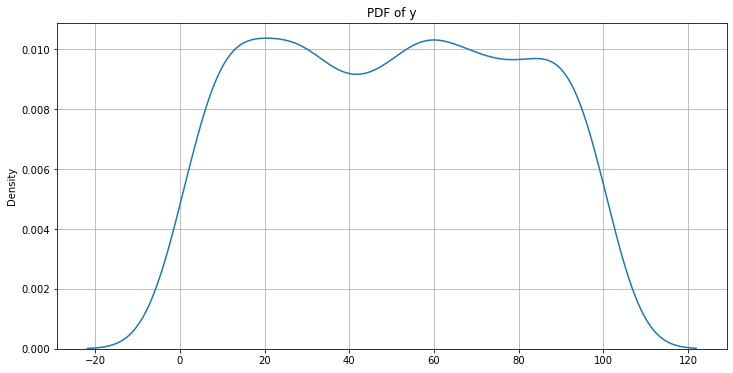

In [31]:
n=np.linspace(0,1,1000)
uni=np.random.uniform(0,1,1000)
uni_1=uni
for i in range(0,99):
    uni_1=np.sum((uni,uni_1),axis=0)
    
n_1=np.linspace(0,1,len(uni_1))
plt.figure(figsize=(12,6))
plt.title('PDF of y')
sns.distplot(uni_1,bins=100,hist=False)
plt.grid()

# (3)

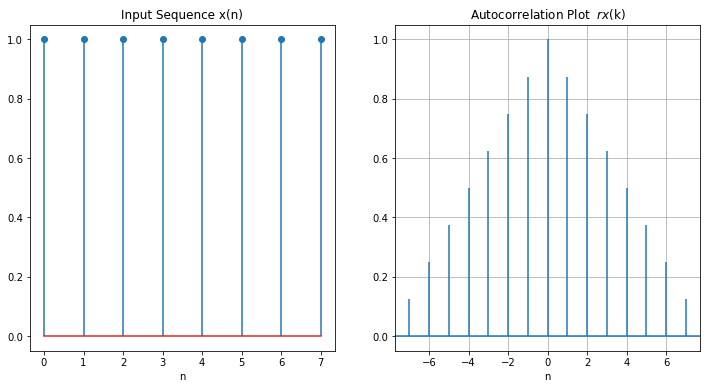

In [137]:
n=np.arange(0,8,1)
x=[]
for i in range(0,8):                   #input sequence
    x.append(1.0)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Input Sequence x(n)')
plt.xlabel('n')
plt.stem(n,x)                        #plot input sequence

plt.subplot(1,2,2)
plt.acorr(x,maxlags=None)                    #plot autocorrelation of sequence
plt.title('Autocorrelation Plot $ \ rx $(k)')
plt.xlabel('n')
plt.grid()
plt.show()

# (4)

# (a)

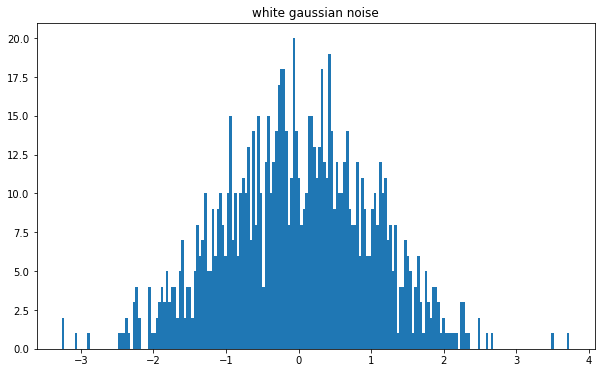

In [89]:
N=1000
samples=np.random.normal(0,1,N)
plt.figure(figsize=(10,6))
plt.hist(samples,200)
plt.title('white gaussian noise')
plt.show()

# (b)

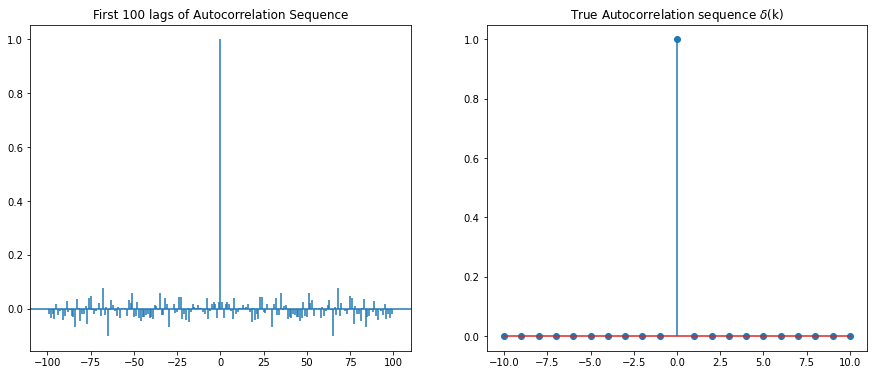

<Figure size 432x288 with 0 Axes>

In [94]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.acorr(samples,maxlags=100)                                  #Auto correlation of white noise
plt.title('First 100 lags of Autocorrelation Sequence')


n=np.arange(-10,11,1)
d_1=[]
for i in range(0,21):
    if(n[i]==0):
        d_1.append(1)
    else:
        d_1.append(0)
plt.subplot(1,2,2)
plt.title('True Autocorrelation sequence $ \delta $(k)')
plt.stem(n,d_1)
plt.show()
plt.tight_layout()

# (c)

<StemContainer object of 3 artists>

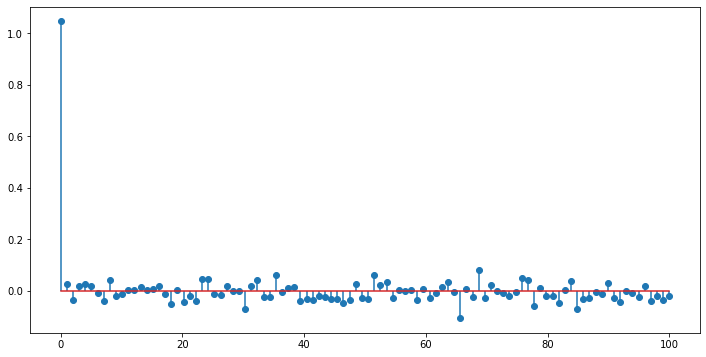

In [135]:
#function for average autocorrelation function
def averaged_autocorr(x,M=100):
    N = len(x)
    r = np.zeros(M)
    for k in range(M):
        for m in range(10):                        # 10 different samples
            for n in range(M):
                if(n-k+100*m<0):
                    r[k] += 0
                else:
                    r[k] += (x[n+100*m]*x[n-k+100*m])/N
    return r

M = 100
r_avg = averaged_autocorr(samples)
l=np.linspace(0,100,len(r_avg))
plt.figure(figsize=(12,6))
plt.stem(l,r_avg)

# (d)

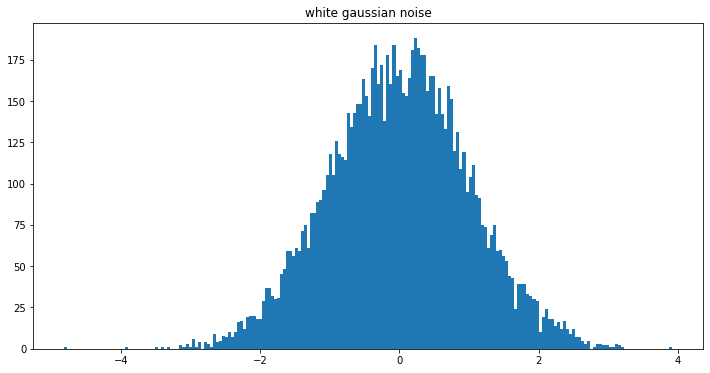

In [90]:

N=10000
sample=np.random.normal(0,1,N)
plt.figure(figsize=(12,6))
plt.hist(sample,200)
plt.title('white gaussian noise')
plt.show()

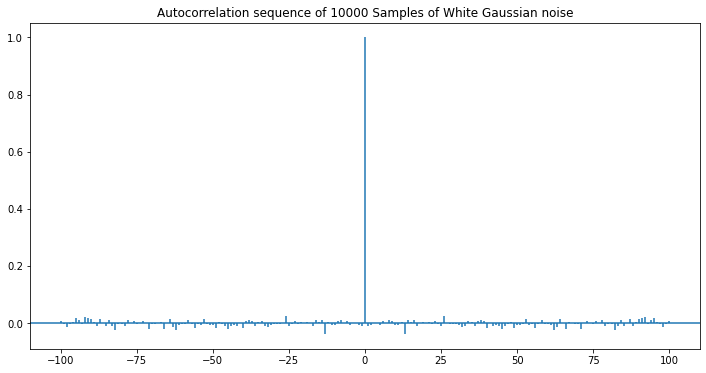

In [93]:
plt.figure(figsize=(12,6))
plt.title('Autocorrelation sequence of 10000 Samples of White Gaussian noise')
plt.acorr(sample,maxlags=100)                                    #autocorrelation sequence of white noise
plt.show()

Comparing the first 100 lags of Autocorrelation sequence of part(b) and (d), we can see that sequence of part (d) is much 
closer to original autocorrelation sequence rx(k) as number of samples has increased compared to part (b).


# (5)

In [138]:
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 
    
    # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    
    cor = numerator/denominator
    return cor

def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov


In [139]:
df=pd.read_csv('Seed.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [140]:
feat1 = df['A'].values
feat2 = df['P'].values
feat3 = df['C'].values
feat4 = df['LK'].values
feat5 = df['WK'].values
feat6 = df['A_Coef'].values
feat7 = df['LKG'].values
feat = [feat1,feat2,feat3,feat4,feat5,feat6,feat7]

In [141]:
data = {'Correlation with custom function':[correlation(feat[0],feat[i]) for i in range(7)],
        'Correlation with numpy function':[np.corrcoef(feat[0],feat[i])[0,1] for i in range(7)],
        'Covariance with custom fuction':[covariance(feat[0],feat[i]) for i in range(7)],
        'Covariance with numpy function':[np.cov(feat[0],feat[i])[0,1] for i in range(7)]
       }
df1 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE 1")
df1

For FEATURE 1


,Correlation with custom function,Correlation with numpy function,Covariance with custom fuction,Covariance with numpy function
feat1,1.000000,1.000000,8.466351,8.466351
feat2,0.994341,0.994341,3.778443,3.778443
feat3,0.608288,0.608288,0.041823,0.041823
feat4,0.949985,0.949985,1.224704,1.224704
feat5,0.970771,0.970771,1.066911,1.066911
feat6,-0.229572,-0.229572,-1.004356,-1.004356
feat7,0.863693,0.863693,1.235133,1.235133


In [142]:
data = {'Correlation with custom function':[correlation(feat[1],feat[i]) for i in range(7)],
        'Correlation with numpy function':[np.corrcoef(feat[1],feat[i])[0,1] for i in range(7)],
        'Covariance with custom fuction':[covariance(feat[1],feat[i]) for i in range(7)],
        'Covariance with numpy function':[np.cov(feat[1],feat[i])[0,1] for i in range(7)],
       }
df2 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE 2 ")
df2

For FEATURE 2 


,Correlation with custom function,Correlation with numpy function,Covariance with custom fuction,Covariance with numpy function
feat1,0.994341,0.994341,3.778443,3.778443
feat2,1.000000,1.000000,1.705528,1.705528
feat3,0.529244,0.529244,0.016332,0.016332
feat4,0.972422,0.972422,0.562666,0.562666
feat5,0.944829,0.944829,0.466065,0.466065
feat6,-0.217340,-0.217340,-0.426766,-0.426766
feat7,0.890784,0.890784,0.571753,0.571753


In [127]:
data = {'Correlation with custom function':[correlation(feat[2],feat[i]) for i in range(7)],
        'Correlation with numpy function':[np.corrcoef(feat[2],feat[i])[0,1] for i in range(7)],
        'Covariance with custom fuction':[covariance(feat[2],feat[i]) for i in range(7)],
        'Covariance with numpy function':[np.cov(feat[2],feat[i])[0,1] for i in range(7)],
       }
df3 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE 3")
df3

For FEATURE 3


,Correlation with custom function,Correlation with numpy function,Covariance with custom fuction,Covariance with numpy function
feat1,0.608288,0.608288,0.041823,0.041823
feat2,0.529244,0.529244,0.016332,0.016332
feat3,1.000000,1.000000,0.000558,0.000558
feat4,0.367915,0.367915,0.003852,0.003852
feat5,0.761635,0.761635,0.006798,0.006798
feat6,-0.331471,-0.331471,-0.011777,-0.011777
feat7,0.226825,0.226825,0.002634,0.002634


In [128]:
data = {'Correlation with custom function':[correlation(feat[3],feat[i]) for i in range(7)],
        'Correlation with numpy function':[np.corrcoef(feat[3],feat[i])[0,1] for i in range(7)],
        'Covariance with custom fuction':[covariance(feat[3],feat[i]) for i in range(7)],
        'Covariance with numpy function':[np.cov(feat[3],feat[i])[0,1] for i in range(7)],
       }
df4 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE 4")
df4

For FEATURE 4


,Correlation with custom function,Correlation with numpy function,Covariance with custom fuction,Covariance with numpy function
feat1,0.949985,0.949985,1.224704,1.224704
feat2,0.972422,0.972422,0.562666,0.562666
feat3,0.367915,0.367915,0.003852,0.003852
feat4,1.000000,1.000000,0.196305,0.196305
feat5,0.860415,0.860415,0.143992,0.143992
feat6,-0.171562,-0.171562,-0.114290,-0.114290
feat7,0.932806,0.932806,0.203125,0.203125


In [129]:
data = {'Correlation with custom function':[correlation(feat[4],feat[i]) for i in range(7)],
        'Correlation with numpy function':[np.corrcoef(feat[4],feat[i])[0,1] for i in range(7)],
        'Covariance with custom fuction':[covariance(feat[4],feat[i]) for i in range(7)],
        'Covariance with numpy function':[np.cov(feat[4],feat[i])[0,1] for i in range(7)]
       }
df5 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE 5")
df5

For FEATURE 5


,Correlation with custom function,Correlation with numpy function,Covariance with custom fuction,Covariance with numpy function
feat1,0.970771,0.970771,1.066911,1.066911
feat2,0.944829,0.944829,0.466065,0.466065
feat3,0.761635,0.761635,0.006798,0.006798
feat4,0.860415,0.860415,0.143992,0.143992
feat5,1.000000,1.000000,0.142668,0.142668
feat6,-0.258037,-0.258037,-0.146543,-0.146543
feat7,0.749131,0.749131,0.139068,0.139068


In [130]:
data = {'Correlation with custom function':[correlation(feat[5],feat[i]) for i in range(7)],
        'Correlation with numpy function':[np.corrcoef(feat[5],feat[i])[0,1] for i in range(7)],
        'Covariance with custom fuction':[covariance(feat[5],feat[i]) for i in range(7)],
        'Covariance with numpy function':[np.cov(feat[5],feat[i])[0,1] for i in range(7)],
       }
df6 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE 6")
df6

For FEATURE 6


,Correlation with custom function,Correlation with numpy function,Covariance with custom fuction,Covariance with numpy function
feat1,-0.229572,-0.229572,-1.004356,-1.004356
feat2,-0.217340,-0.217340,-0.426766,-0.426766
feat3,-0.331471,-0.331471,-0.011777,-0.011777
feat4,-0.171562,-0.171562,-0.114290,-0.114290
feat5,-0.258037,-0.258037,-0.146543,-0.146543
feat6,1.000000,1.000000,2.260684,2.260684
feat7,-0.011079,-0.011079,-0.008187,-0.008187


In [131]:
data = {'Correlation with custom function':[correlation(feat[6],feat[i]) for i in range(7)],
        'Correlation with numpy function':[np.corrcoef(feat[6],feat[i])[0,1] for i in range(7)],
        'Covariance with custom fuction':[covariance(feat[6],feat[i]) for i in range(7)],
        'Covariance with numpy function':[np.cov(feat[6],feat[i])[0,1] for i in range(7)],
       }
df7 = pd.DataFrame(data,index=[f"feat{i}" for i in range(1,8)])
print("For FEATURE 7")
df7

For FEATURE 7


,Correlation with custom function,Correlation with numpy function,Covariance with custom fuction,Covariance with numpy function
feat1,0.863693,0.863693,1.235133,1.235133
feat2,0.890784,0.890784,0.571753,0.571753
feat3,0.226825,0.226825,0.002634,0.002634
feat4,0.932806,0.932806,0.203125,0.203125
feat5,0.749131,0.749131,0.139068,0.139068
feat6,-0.011079,-0.011079,-0.008187,-0.008187
feat7,1.000000,1.000000,0.241553,0.241553


# (6)

# (a)

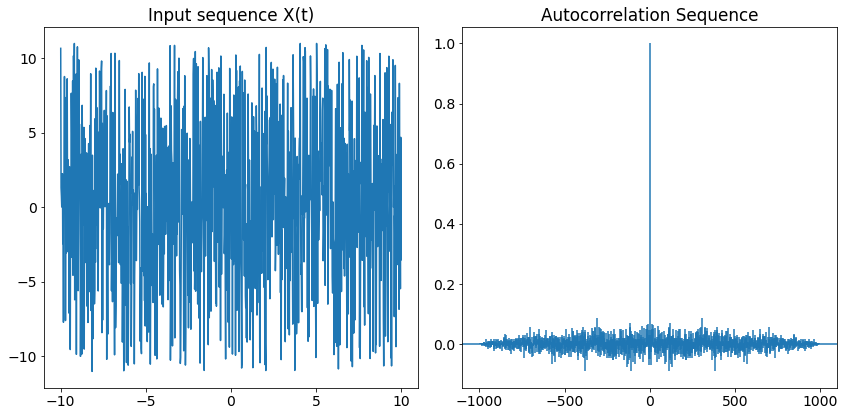

In [38]:
t=np.linspace(-10,10,1000)
phi_1=np.random.uniform(-np.pi,np.pi,1000)
phi_2=np.random.uniform(0,2*(np.pi),1000)
#define random process X(t)

def X(t):
    return (5*np.sin(2*t+phi_1))+(6*np.cos(3*t+phi_2))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Input sequence X(t)')
plt.plot(t,X(t))

plt.subplot(1,2,2)
plt.title('Autocorrelation Sequence')
plt.acorr(X(t),maxlags=None)                   #Autocorrelation plot
plt.tight_layout()

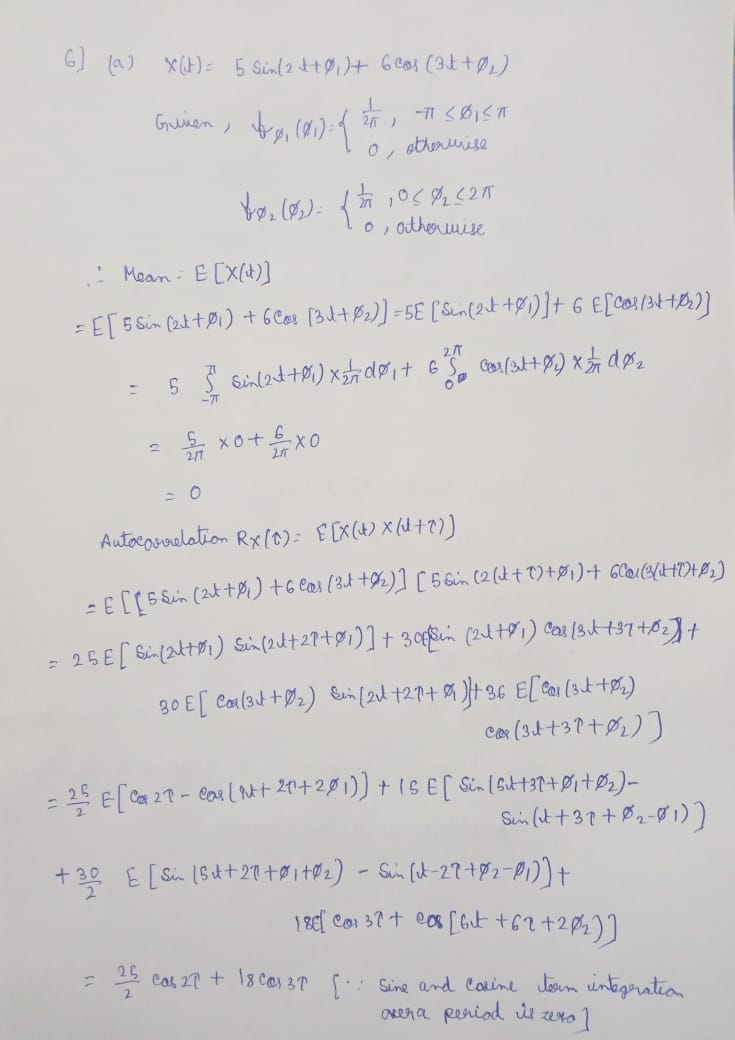

# (b)

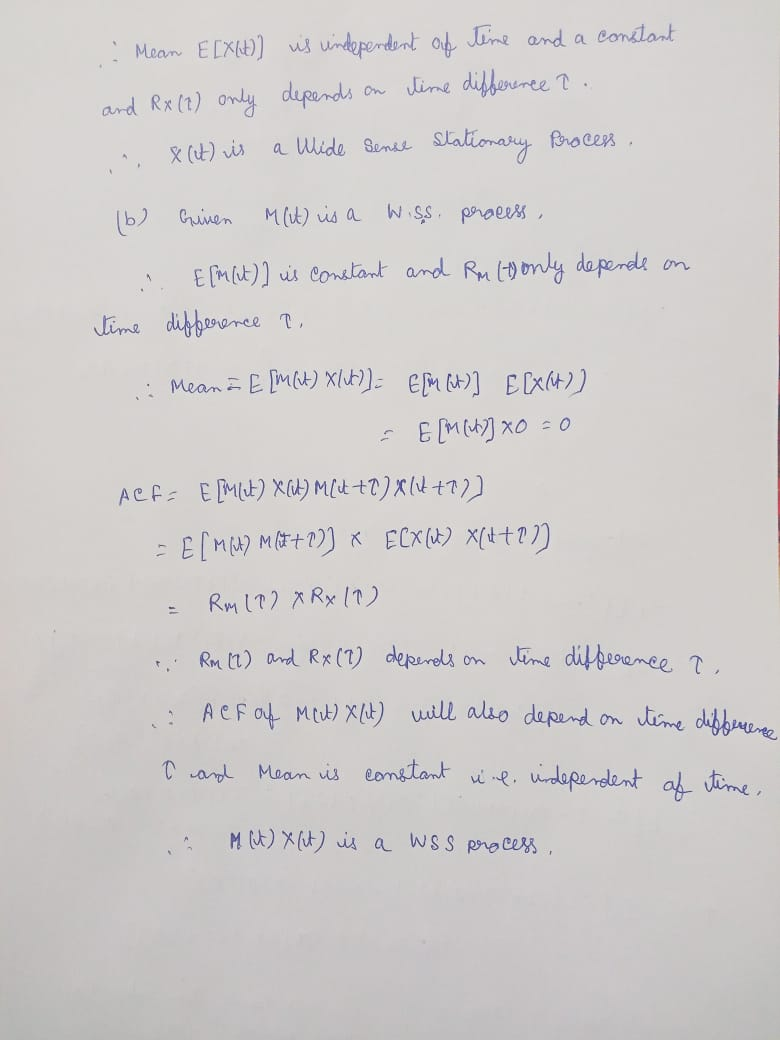

# (7)

# (a)

[[0.401362   2.50026392 9.23385439]
 [2.15973042 7.27216905 1.12870833]]


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

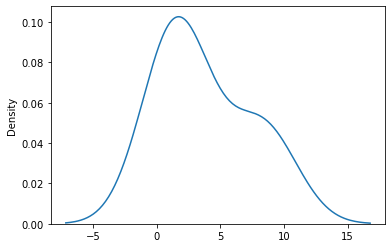

In [105]:
chi=np.random.chisquare(2,size=(2,3))
print(chi)
sns.distplot(chi,hist=False)

# (b)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

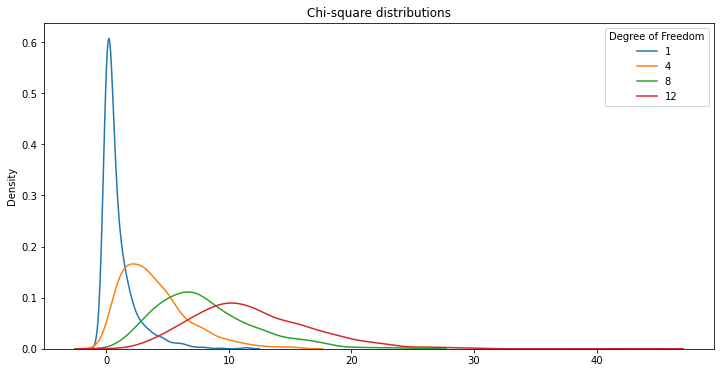

In [120]:
plt.figure(figsize=(12,6))
sns.distplot(np.random.chisquare(1,1000),hist=False)
sns.distplot(np.random.chisquare(4,1000),hist=False)
sns.distplot(np.random.chisquare(8,1000),hist=False)
sns.distplot(np.random.chisquare(12,1000),hist=False)
plt.title('Chi-square distributions')
plt.legend(title='Degree of Freedom',loc='best',labels=['1','4','8','12'])
plt.show()

# (8)

# (a)

In [35]:
exp=np.random.exponential(2,(2,3))
print(exp)

[[0.82889106 3.17998878 1.85660056]
 [1.23883409 0.09144819 0.29623267]]


# (b)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Exponential distribution PDF with scale=2'}, ylabel='Density'>

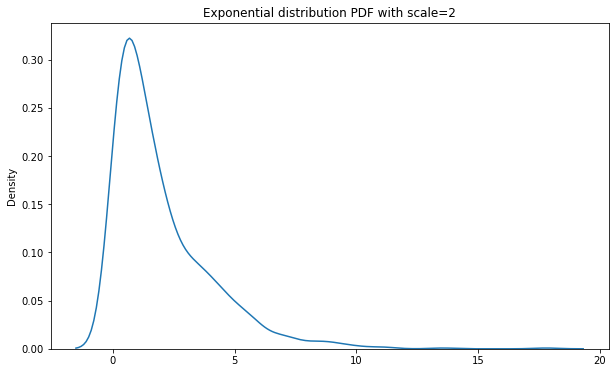

In [36]:
plt.figure(figsize=(10,6))
plt.title('Exponential distribution PDF with scale=2')
sns.distplot(np.random.exponential(scale=2,size=1000),hist=False)

# (9)

# (a)

In [35]:
a=np.array([2,4,6,8])
num=np.random.choice(a,100,p=[0.1,0.3,0.6,0])
print('array of 2, 4, 6 and 8:\n',num)

array of 2, 4, 6 and 8:
 [6 4 2 6 6 4 6 4 6 4 4 4 6 2 6 4 2 6 6 4 6 6 4 6 6 6 2 6 6 6 4 2 6 6 4 4 2
 6 4 6 6 6 6 6 6 6 4 4 4 6 4 4 2 6 6 6 6 4 4 6 6 2 6 6 6 6 6 6 4 2 6 4 4 6
 6 2 6 6 2 6 6 6 6 4 6 6 6 4 6 6 6 4 4 6 4 4 6 6 2 6]


# (b)

In [39]:
n_1=np.reshape(np.random.choice(num,15),(3,5))
print('3*5 matrix: \n',n_1)

3*5 matrix: 
 [[6 2 2 4 4]
 [4 6 6 6 2]
 [6 4 4 4 6]]


# (10)

# (a)

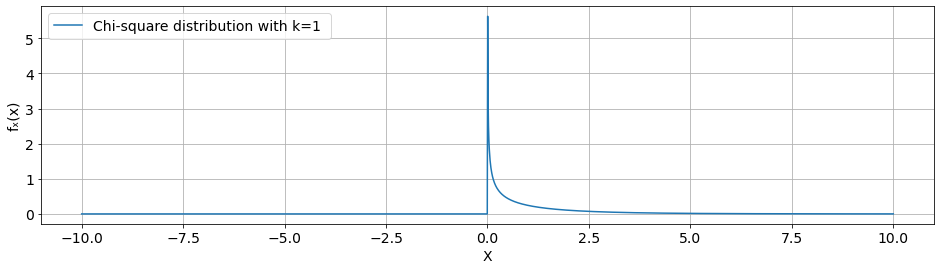

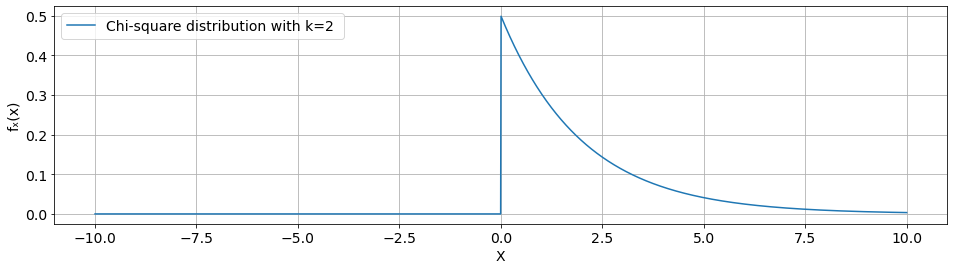

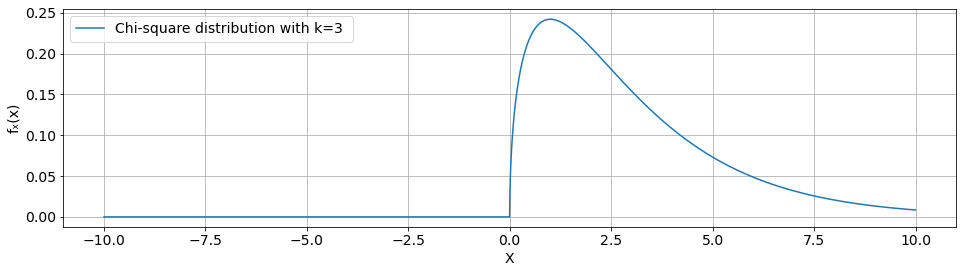

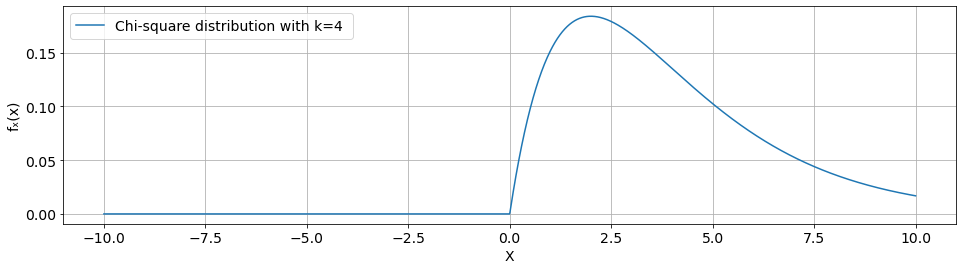

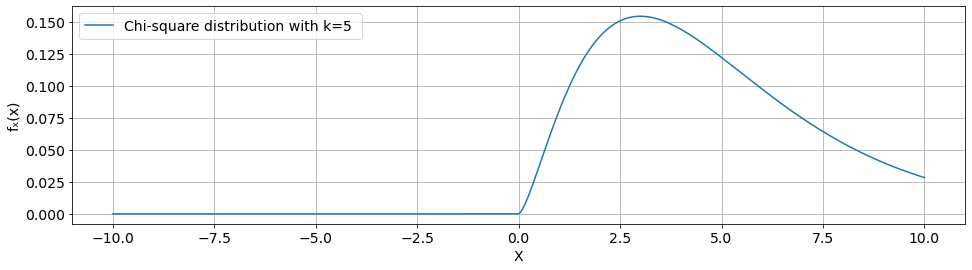

In [37]:
from math import gamma

#function for central chi-squared distribution
def plot_chisquare(n):
    df=n
    x=np.linspace(-10,10,2000)
    fx=[]
    for i in x:
        if (i<0):
            fx.append(0)
        else:
            fx.append(1 / (2*gamma(df/2)) * (i/2)**(df/2-1) * np.exp(-i/2))
    
    plt.figure(figsize=(16,4))
    plt.rcParams.update({'font.size':14})
    plt.plot(x, fx,label=f'Chi-square distribution with k={n} ')
    plt.xlabel('X')
    plt.ylabel(u'f\u2093(x)')
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()
for i in range(1,6):    
    plot_chisquare(i)

# (b)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

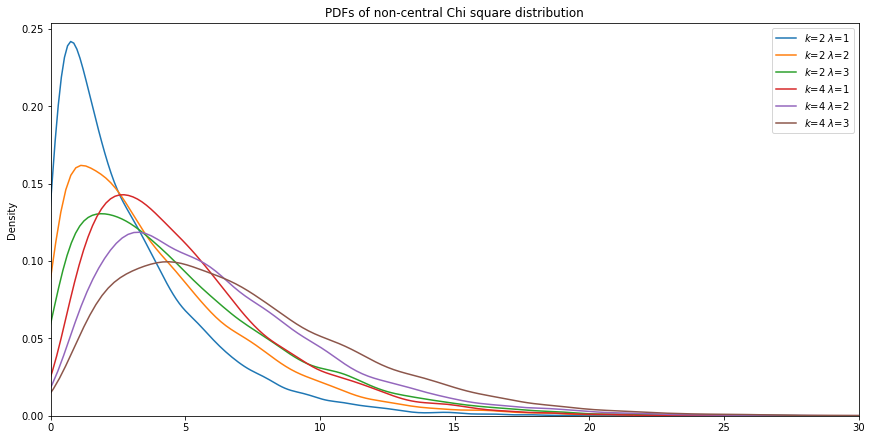

In [4]:
ks=np.asarray([2,4])           #degrees of freedoms to simulate
ldas = np.asarray([1,2,3])     #non-centrality parameters to simulate
nSamp=10000                    #number of samples to generate

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(12,6) ,constrained_layout=True)

for i,k in enumerate(ks):
    for j,lda in enumerate(ldas):
        #Generate non-central Chi-squared distributed random numbers
        X = np.random.noncentral_chisquare(df=k, nonc = lda, size = nSamp)
        sns.distplot(X,hist=False,label=r'$k$={} $\lambda$={}'.format(k,lda))

ax.set_xlim(left=0,right=30)
ax.legend()
ax.set_title('PDFs of non-central Chi square distribution')
plt.show()